<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Bert Sentiment Analysis
[Ejemplo similar en Pytorch](https://colab.research.google.com/drive/1PHv-IRLPCtv7oTcIGbsgZHqrB5LPvB7S#scrollTo=m_mRflxPl32F)

### Datos del alumno:

- Alumno: Víctor David Silva
- Cohorte: 14

In [1]:
import tensorflow as tf

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.13.0


In [2]:
!pip install transformers --quiet

In [3]:
import tensorflow
from transformers import TFBertModel
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Modelo 1 (base): 

- 3 clases
- 1 capa lineal

### Definiendo modelo

In [4]:
# Usamos bert en inglés porque el dataset es en inglés, usamos el modelo base de BERT
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

2024-09-01 23:32:35.176699: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-09-01 23:32:35.176734: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-01 23:32:35.176744: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-01 23:32:35.176831: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-01 23:32:35.177092: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm

In [5]:
max_length = 140

In [6]:
# Vamos a clasificar en 3 clases
output_shape = 3

bert_model.bert.trainable = False # bert_model está empaquetado, pero se pueden acceder a algunos atributos. Por default está en TRUE

# Se definen las 2 capas de entrada de BERT
input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')


outputs = bert_model(input_ids, attention_mask=attention_mask)

# Usamos el condensado de toda la secuencia que armo BERT
pooled_output = outputs.pooler_output

# Pasamos por una capa de Dropout
x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

# Todo el modelo va a ser lo que entra por input_ids y lo que sale por outputs
model1 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [7]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

In [8]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [9]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0  45270      0  0:00:02  0:00:02 --:--:--  102k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   440k      0  0:00:15  0:00:15 --:--:-- 2181k


In [10]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

# Solo nos vamos a quedar con el texto de la review.

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [11]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


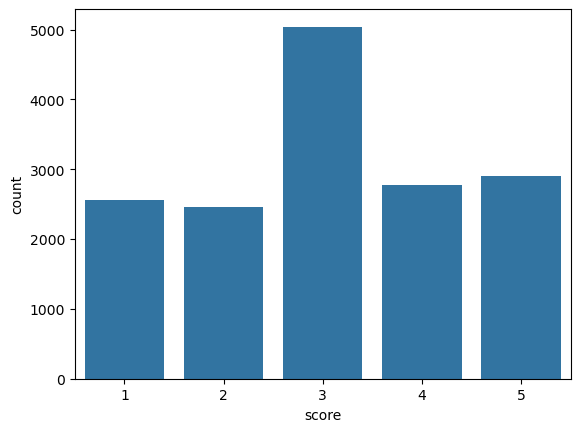

In [12]:
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score);

# Tiene 5 clases, de 1 a 5, la del medio es mayoritaria. Se puede restructurar el problema colapsando 1 o 2 a malo, 4 y 5 en bueno

Se tiene un score que va desde 1 a 5, es decir 5 posibles calificaciones. 

## Limpieza de datos

Se van a condensar los resultados de 1 y 2 en 0, y de 4 y 5 en 2, dejando el score de 3 como 1. De esta manera se convierte la cantidad de clases en 3 siendo estas:

- negative
- neutral
- positive

In [13]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

/var/folders/rz/52wvyybx3618hlzk3v9hjvdc0000gn/T/ipykernel_12003/3945955594.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(class_names);


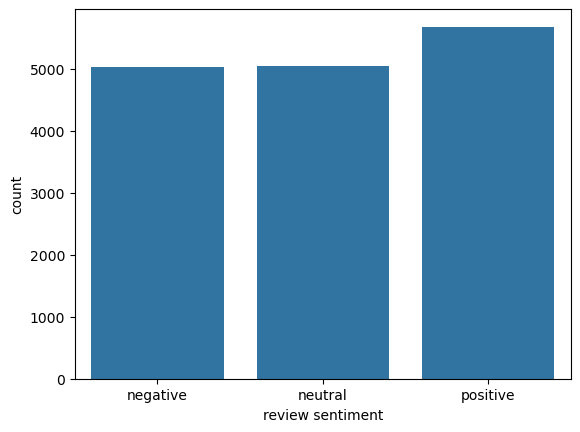

In [14]:
ax = sns.countplot(x='sentiment', data=df)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [15]:
# Se observa que ahora los valores único son solo 3
df['sentiment'].unique()

array([0, 1, 2])

In [16]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

Median: 139.0


/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


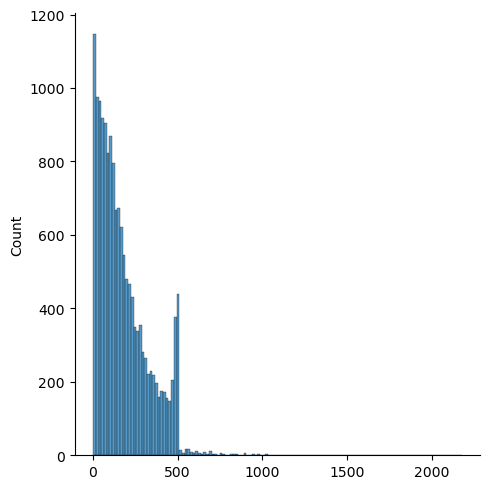

In [17]:
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens);

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

# Transformamos en vectores OHE

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


## 1 - Data generator


In [20]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset, codifica el modelo para lo que espera en la entrada
from transformers import BertTokenizer
import numpy as np

In [21]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [22]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences)) # Le vamos a pasar una función, esto es útil cuando no se pueden tener todos los datos en RAM, sino que los inyecta de a poco en batches 
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)
# Hacemos 2 splits porque tenemos train, val, test.
# Va a consumir los índices y va a saber que pasarle como train y que como val

In [23]:
print('Cantidad de índices de train: ', idx_train.shape[0])
print('Cantidad de índices de val: ', idx_val.shape[0])
print('Cantidad de índices de test: ', idx_test.shape[0])

Cantidad de índices de train:  10076
Cantidad de índices de val:  2520
Cantidad de índices de test:  3150


In [24]:

def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i], 
                                                          text_b = None, # BERT podría tomar 2 textos serparados y podía unirlos con un token especial de separación. Pero en text b no ponemos nada
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]
  
    return train_InputExamples, validation_InputExamples

# Consume la lista anterior y el tokenizador de bert 
def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensores de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante, devuelve una tupla con la palabra yield (como un return), que mantiene la memoria del estado anterior, menteniendo el for activo.
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32), # Le definimos el tipo de datos de la salida
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]), # Le damos el shape
        ),
    )

In [25]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

# Entran los ejemplos de train
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32) # Podemos configurar el tamaño de batch y mezclamos de a 100 datos

# Entran los ejemplos de val
validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [26]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [27]:
X_test = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [28]:
y_test = y[idx_test]

## 2 - BERT multiclass classification

In [29]:
history1 = model1.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10


2024-09-01 00:05:44.856573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    315/Unknown - 571s 2s/step - loss: 1.0852 - accuracy: 0.4065 - f1_score: 0.3966

2024-09-01 00:15:10.168509: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 9204806435597979883
2024-09-01 00:15:10.168522: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 15964221170054699455
2024-09-01 00:15:10.168528: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3045402962594619745
2024-09-01 00:15:10.168534: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3775849740830813187
2024-09-01 00:15:10.168538: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 8774107470228540801
2024-09-01 00:15:10.168544: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 13084385984910741779
2024-09-01 00:15:10.169950: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv i

315/315 [==============================] - 701s 2s/step - loss: 1.0852 - accuracy: 0.4065 - f1_score: 0.3966 - val_loss: 1.0326 - val_accuracy: 0.4218 - val_f1_score: 0.3365
Epoch 2/10


2024-09-01 00:17:19.642501: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 4451680433971234396
2024-09-01 00:17:19.642523: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 4335902681185166796
2024-09-01 00:17:19.642528: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 5923704640674311728
2024-09-01 00:17:19.642531: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 16246209487815238079
2024-09-01 00:17:19.642545: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7668977491425559467
2024-09-01 00:17:19.642558: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8947903664927126351
2024-09-01 00:17:19.642564: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv it

315/315 [==============================] - 752s 2s/step - loss: 1.0125 - accuracy: 0.4925 - f1_score: 0.4793 - val_loss: 0.9643 - val_accuracy: 0.5433 - val_f1_score: 0.4881
Epoch 3/10
315/315 [==============================] - 780s 2s/step - loss: 0.9825 - accuracy: 0.5089 - f1_score: 0.4965 - val_loss: 0.9460 - val_accuracy: 0.5440 - val_f1_score: 0.4535
Epoch 4/10
315/315 [==============================] - 779s 2s/step - loss: 0.9611 - accuracy: 0.5288 - f1_score: 0.5163 - val_loss: 0.9150 - val_accuracy: 0.5607 - val_f1_score: 0.5039
Epoch 5/10
315/315 [==============================] - 766s 2s/step - loss: 0.9508 - accuracy: 0.5368 - f1_score: 0.5256 - val_loss: 0.9107 - val_accuracy: 0.5571 - val_f1_score: 0.5282
Epoch 6/10
315/315 [==============================] - 721s 2s/step - loss: 0.9321 - accuracy: 0.5426 - f1_score: 0.5319 - val_loss: 0.9048 - val_accuracy: 0.5567 - val_f1_score: 0.5337
Epoch 7/10
315/315 [==============================] - 684s 2s/step - loss: 0.9219 - ac

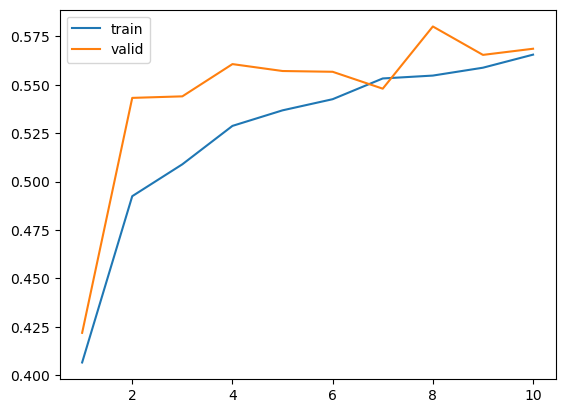

In [30]:
plot_train_metrics(history1)

In [31]:
y_hat_prob1 = model1.predict(X_test)
y_hat_prob1[:3]

2024-09-01 02:07:22.073638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 109s 1s/step


array([[0.5088324 , 0.30407506, 0.18709248],
       [0.5293179 , 0.20611766, 0.26456442],
       [0.222199  , 0.3138763 , 0.46392474]], dtype=float32)

In [32]:
y_hat1 = np.argmax(y_hat_prob1, axis=1)

In [33]:
# Calcular la exactitud (accuracy), podemos ver también el F1 Macro score
scores = model1.evaluate(X_test, y_test)
scores[1]

2024-09-01 02:09:11.027301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 115s 1s/step - loss: 0.8762 - accuracy: 0.5854 - f1_score: 0.5294


0.5853968262672424

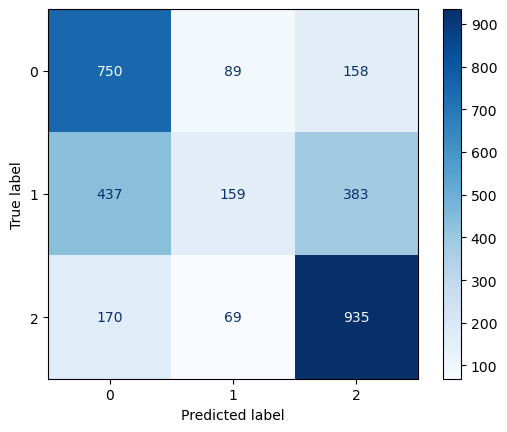

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test.argmax(axis=1), y_hat1)
cmd1 = ConfusionMatrixDisplay(cm1, display_labels=list(range(3)))
cmd1.plot(cmap=plt.cm.Blues)
plt.show()

Se observa que se tuvo buenos resultados para perdecir que son valores positivo o negativos, pero no así tan bien con los comentarios neutrales.

## Ensayo

In [35]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [36]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [37]:
y_prob_ensayo = model1.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)]);

1/1 [==============================] - 4s 4s/step
Clasificación: positive


In [38]:
text = "I hate this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  1045  5223  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [39]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [40]:
y_prob_ensayo = model1.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)]);

1/1 [==============================] - 0s 381ms/step
Clasificación: negative


In [41]:
text = "This app it's okay"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  2023 10439  2009  1005  1055  3100   102     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [42]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [43]:
y_prob_ensayo = model1.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)]);

1/1 [==============================] - 0s 292ms/step
Clasificación: positive


En estos 3 casos, se observa que el positivo y el negativo fueron correctamente predichos, pero en cambio, en el neutral como que tiene a ser postivo fue tomado como este.

# Modelo 2: 

- 3 clases de salida
- 1 capa densa adicional

### Creación de modelo

In [44]:
# Vamos a clasificar en 3 clases como en el modelo anterior
output_shape = 3

bert_model.bert.trainable = False # bert_model está empaquetado, pero se pueden acceder a algunos atributos. Por default está en TRUE

# Se definen las 2 capas de entrada de BERT
input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')


outputs = bert_model(input_ids, attention_mask=attention_mask)

# Usamos el condensado de toda la secuencia que armo BERT
pooled_output = outputs.pooler_output

# Se agrega otra capa densa la arquitectura
x = tensorflow.keras.layers.Dense(128, activation='relu')(pooled_output)

# Pasamos por una capa de Dropout
x = tensorflow.keras.layers.Dropout(0.2)(x)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

# Todo el modelo va a ser lo que entra por input_ids y lo que sale por outputs
model2 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [45]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

### Entrenamiento del modelo

In [46]:
history2 = model2.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10


2024-09-01 02:11:14.338372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    315/Unknown - 385s 1s/step - loss: 1.1929 - accuracy: 0.3944 - f1_score: 0.3902

2024-09-01 02:17:35.003884: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 2411603704272980103
2024-09-01 02:17:35.003901: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 15012395284191277351
2024-09-01 02:17:35.003904: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 14900109716809792141
2024-09-01 02:17:35.003909: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 14829061123244577975
2024-09-01 02:17:35.003913: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 6205869306004178793
2024-09-01 02:17:35.003920: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8225976484578106430
2024-09-01 02:17:35.003922: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send 

315/315 [==============================] - 480s 1s/step - loss: 1.1929 - accuracy: 0.3944 - f1_score: 0.3902 - val_loss: 1.2551 - val_accuracy: 0.3750 - val_f1_score: 0.2348
Epoch 2/10


2024-09-01 02:19:10.008116: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 3818937852005117967
2024-09-01 02:19:10.008129: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 6123949586296404003
2024-09-01 02:19:10.008133: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 15338067993699764971
2024-09-01 02:19:10.008135: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 4578114663241350531
2024-09-01 02:19:10.008139: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 13786076097660341002
2024-09-01 02:19:10.008143: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 11513543344413725672
2024-09-01 02:19:10.008146: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv 

315/315 [==============================] - 449s 1s/step - loss: 1.0486 - accuracy: 0.4740 - f1_score: 0.4671 - val_loss: 0.9990 - val_accuracy: 0.5349 - val_f1_score: 0.4330
Epoch 3/10
315/315 [==============================] - 452s 1s/step - loss: 1.0220 - accuracy: 0.4910 - f1_score: 0.4828 - val_loss: 1.1836 - val_accuracy: 0.5079 - val_f1_score: 0.3988
Epoch 4/10
315/315 [==============================] - 452s 1s/step - loss: 0.9843 - accuracy: 0.5181 - f1_score: 0.5096 - val_loss: 0.9334 - val_accuracy: 0.5579 - val_f1_score: 0.4636
Epoch 5/10
315/315 [==============================] - 450s 1s/step - loss: 0.9630 - accuracy: 0.5315 - f1_score: 0.5216 - val_loss: 0.9752 - val_accuracy: 0.5250 - val_f1_score: 0.4441
Epoch 6/10
315/315 [==============================] - 449s 1s/step - loss: 0.9492 - accuracy: 0.5354 - f1_score: 0.5256 - val_loss: 1.0069 - val_accuracy: 0.5627 - val_f1_score: 0.4478
Epoch 7/10
315/315 [==============================] - 452s 1s/step - loss: 0.9457 - ac

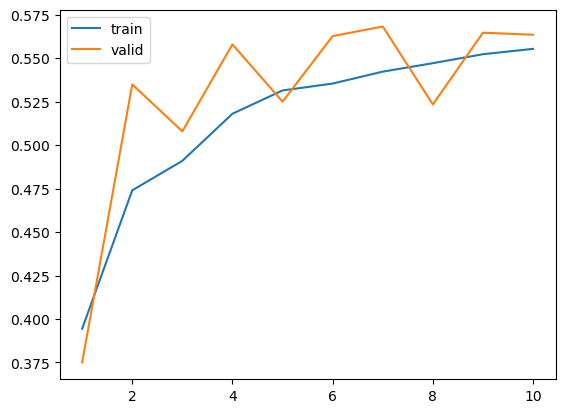

In [47]:
plot_train_metrics(history2)

In [48]:
y_hat_prob2 = model2.predict(X_test)
y_hat_prob2[:3]

2024-09-01 03:27:10.107918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 121s 1s/step


array([[0.47520524, 0.28694442, 0.23785034],
       [0.45921233, 0.19303533, 0.34775233],
       [0.10580219, 0.21700874, 0.6771891 ]], dtype=float32)

In [49]:
y_hat2 = np.argmax(y_hat_prob2, axis=1)

In [50]:
# Calcular la exactitud (accuracy), podemos ver también el F1 Macro score
scores2 = model2.evaluate(X_test, y_test)
scores2[1]

2024-09-01 03:29:11.555889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 126s 1s/step - loss: 0.9022 - accuracy: 0.5749 - f1_score: 0.4952


0.574920654296875

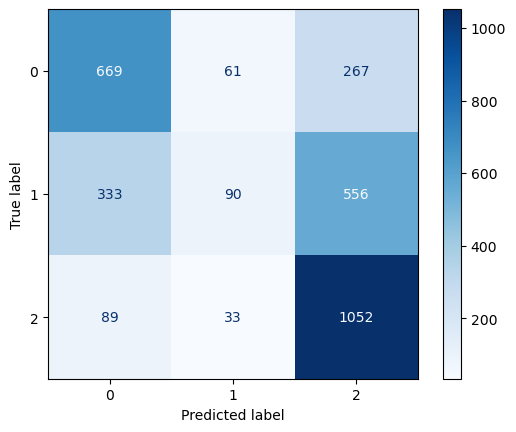

In [51]:
cm2 = confusion_matrix(y_test.argmax(axis=1), y_hat2)
cmd2 = ConfusionMatrixDisplay(cm2, display_labels=list(range(3)))
cmd2.plot(cmap=plt.cm.Blues)
plt.show()

### Evaluación

In [52]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [53]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [54]:
y_prob_ensayo2 = model2.predict(X_ensayo)
y_prob2 = np.argmax(y_prob_ensayo2, axis=1)
print("Clasificación:", class_names[int(y_prob2)]);

1/1 [==============================] - 5s 5s/step
Clasificación: positive


In [55]:
text = "I hate this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  1045  5223  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [56]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [57]:
y_prob_ensayo2 = model2.predict(X_ensayo)
y_prob2 = np.argmax(y_prob_ensayo2, axis=1)
print("Clasificación:", class_names[int(y_prob2)]);

1/1 [==============================] - 1s 632ms/step
Clasificación: negative


In [58]:
text = "This app it's okay"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  2023 10439  2009  1005  1055  3100   102     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [59]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [60]:
y_prob_ensayo2 = model2.predict(X_ensayo)
y_prob2 = np.argmax(y_prob_ensayo2, axis=1)
print("Clasificación:", class_names[int(y_prob2)]);

1/1 [==============================] - 1s 671ms/step
Clasificación: positive


En estos 3 casos, se observa que el positivo y el negativo fueron correctamente predichos, pero en cambio, en el neutral como que tiene a ser postivo fue tomado como este.

# Modelo 3:

- 5 clases de salida

### Creación del modelo

In [61]:
# Vamos a clasificar en 5 clases
output_shape = 5

bert_model.bert.trainable = False # bert_model está empaquetado, pero se pueden acceder a algunos atributos. Por default está en TRUE

# Se definen las 2 capas de entrada de BERT
input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')


outputs = bert_model(input_ids, attention_mask=attention_mask)

# Usamos el condensado de toda la secuencia que armo BERT
pooled_output = outputs.pooler_output

# Pasamos por una capa de Dropout
x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

# Todo el modelo va a ser lo que entra por input_ids y lo que sale por outputs
model3 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [62]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

### Datos para 5 clases

In [63]:
# Armar el dataset nuevamente pero ahora dejamos las 5 clases
# Solo nos vamos a quedar con el texto de la review.
df5 = pd.read_csv('reviews.csv')

In [64]:
# Balancear los datos
df5['sentiment'] = df5['score']-1
class_names = ['very negative', 'negative', 'neutral', 'positive', 'very positive']

In [65]:
# Se observa que ahora los valores únicos son 5
df5['sentiment'].unique()

array([0, 1, 2, 3, 4])

/var/folders/rz/52wvyybx3618hlzk3v9hjvdc0000gn/T/ipykernel_4970/3497894424.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(class_names);


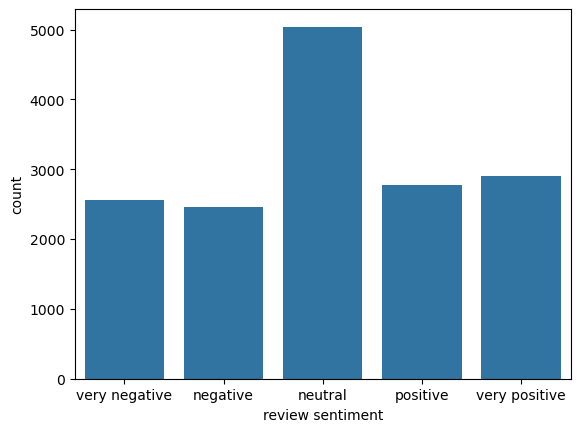

In [66]:
ax = sns.countplot(x='sentiment', data=df5)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [67]:
sentences = df5['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

Median: 139.0


/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


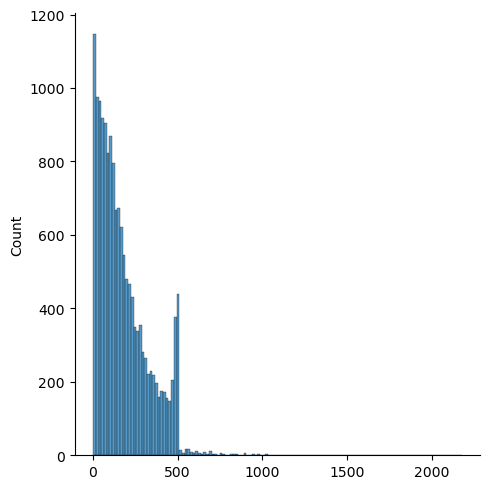

In [68]:
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens);

In [69]:
y = df5['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:5])
output_shape = y.shape[1]
print("output shape:", output_shape)

# Transformamos en vectores OHE

y shape: (15746,)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
output shape: 5


### Generador de datos

In [70]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer3 = BertTokenizer.from_pretrained("bert-base-uncased")

/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [71]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences)) # Le vamos a pasar una función, esto es útil cuando no se pueden tener todos los datos en RAM, sino que los inyecta de a poco en batches 
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)
# Hacemos 2 splits porque tenemos train, val, test.
# Va a consumir los índices y va a saber que pasarle como train y que como val

In [72]:
print('Cantidad de índices de train: ', idx_train.shape[0])
print('Cantidad de índices de val: ', idx_val.shape[0])
print('Cantidad de índices de test: ', idx_test.shape[0])

Cantidad de índices de train:  10076
Cantidad de índices de val:  2520
Cantidad de índices de test:  3150


In [73]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

# Entran los ejemplos de train
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer3, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32) # Podemos configurar el tamaño de batch y mezclamos de a 100 datos

# Entran los ejemplos de val
validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer3, max_length=max_length)
validation_data = validation_data.batch(32)

In [74]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer3(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [75]:
X_test = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [76]:
y_test = y[idx_test]

### Entrenamiento del modelo

In [77]:
history3 = model3.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10


2024-09-01 03:31:35.952095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    315/Unknown - 399s 1s/step - loss: 1.5600 - accuracy: 0.3215 - f1_score: 0.2268

2024-09-01 03:38:10.922857: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 1832241782142804048
2024-09-01 03:38:10.922872: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 15782676441471359792
2024-09-01 03:38:10.922878: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 2047265359506492462
2024-09-01 03:38:10.922882: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 4866959996055959548
2024-09-01 03:38:10.922889: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 1806887163147372753
2024-09-01 03:38:10.922897: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 6392434887320004965
2024-09-01 03:38:10.922900: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send it

315/315 [==============================] - 505s 2s/step - loss: 1.5600 - accuracy: 0.3215 - f1_score: 0.2268 - val_loss: 1.4799 - val_accuracy: 0.3865 - val_f1_score: 0.2074
Epoch 2/10


2024-09-01 03:39:57.135146: I tensorflow/core/framework/local_rendezvous.cc:409] Local rendezvous send item cancelled. Key hash: 17369567727886768113
2024-09-01 03:39:57.135162: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 5112077279884794494
2024-09-01 03:39:57.135175: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 357615282006514222
2024-09-01 03:39:57.135180: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 11206983804928598113
2024-09-01 03:39:57.135191: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 9982061832173405303
2024-09-01 03:39:57.135196: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 7414126909189899939
2024-09-01 03:39:57.135200: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv it

315/315 [==============================] - 461s 1s/step - loss: 1.4856 - accuracy: 0.3638 - f1_score: 0.2556 - val_loss: 1.4491 - val_accuracy: 0.3766 - val_f1_score: 0.3066
Epoch 3/10
315/315 [==============================] - 462s 1s/step - loss: 1.4562 - accuracy: 0.3707 - f1_score: 0.2784 - val_loss: 1.4239 - val_accuracy: 0.3694 - val_f1_score: 0.3256
Epoch 4/10
315/315 [==============================] - 460s 1s/step - loss: 1.4333 - accuracy: 0.3866 - f1_score: 0.2990 - val_loss: 1.3777 - val_accuracy: 0.4421 - val_f1_score: 0.3333
Epoch 5/10
315/315 [==============================] - 461s 1s/step - loss: 1.4063 - accuracy: 0.3949 - f1_score: 0.3105 - val_loss: 1.3599 - val_accuracy: 0.4512 - val_f1_score: 0.3983
Epoch 6/10
315/315 [==============================] - 459s 1s/step - loss: 1.3894 - accuracy: 0.4076 - f1_score: 0.3260 - val_loss: 1.3378 - val_accuracy: 0.4524 - val_f1_score: 0.3669
Epoch 7/10
315/315 [==============================] - 460s 1s/step - loss: 1.3815 - ac

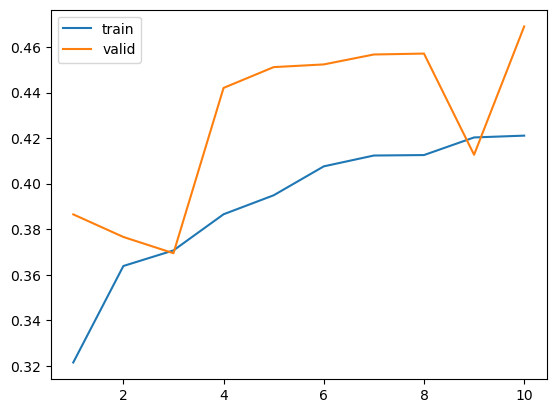

In [78]:
plot_train_metrics(history3)

In [79]:
y_hat_prob3 = model3.predict(X_test)
y_hat_prob3[:3]

2024-09-01 04:48:49.504651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 135s 1s/step


array([[0.22799541, 0.28182343, 0.35310513, 0.08672142, 0.05035459],
       [0.18840156, 0.32579935, 0.312217  , 0.09528887, 0.07829322],
       [0.06216483, 0.2047601 , 0.4058984 , 0.20407069, 0.12310602]],
      dtype=float32)

In [80]:
y_hat3 = np.argmax(y_hat_prob3, axis=1)

In [81]:
# Calcular la exactitud (accuracy), podemos ver también el F1 Macro score
scores3 = model3.evaluate(X_test, y_test)
scores3[1]

2024-09-01 04:51:04.915537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 132s 1s/step - loss: 1.3213 - accuracy: 0.4368 - f1_score: 0.3516


0.43682539463043213

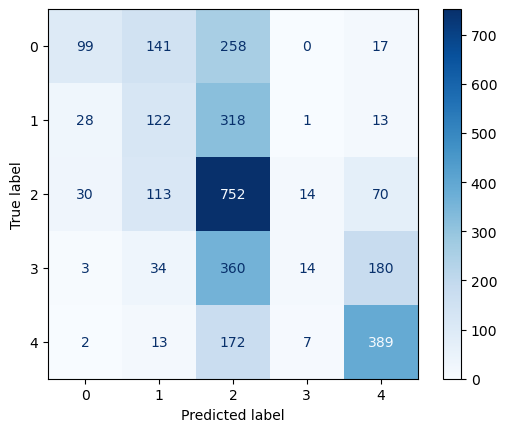

In [82]:
cm3 = confusion_matrix(y_test.argmax(axis=1), y_hat3)
cmd3 = ConfusionMatrixDisplay(cm3, display_labels=list(range(5)))
cmd3.plot(cmap=plt.cm.Blues)
plt.show()

### Evaluación

In [83]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer3.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/Users/victordavidsilva/tensorflow-test/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [84]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [85]:
y_prob_ensayo3 = model3.predict(X_ensayo)
y_prob3 = np.argmax(y_prob_ensayo3, axis=1)
print("Clasificación:", class_names[int(y_prob3)]);

1/1 [==============================] - 8s 8s/step
Clasificación: very positive


In [86]:
text = "I hate this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer3.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  1045  5223  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [87]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [88]:
y_prob_ensayo3 = model3.predict(X_ensayo)
y_prob3 = np.argmax(y_prob_ensayo3, axis=1)
print("Clasificación:", class_names[int(y_prob3)]);

1/1 [==============================] - 1s 691ms/step
Clasificación: very negative


In [89]:
text = "This app it's okay"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer3.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids']);
print("Attention mask:", tf_batch['attention_mask']);

Inputs ids: tf.Tensor(
[[  101  2023 10439  2009  1005  1055  3100   102     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [90]:
X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

In [91]:
y_prob_ensayo3 = model3.predict(X_ensayo)
y_prob3 = np.argmax(y_prob_ensayo3, axis=1)
print("Clasificación:", class_names[int(y_prob3)]);

1/1 [==============================] - 2s 2s/step
Clasificación: neutral


En estos 3 casos, se observa que fueron predichos de forma correcta.

## Conclusiones

Se puede apreciar que luego de realizar el feature extractor los modelos puedieron dar resultados satisfactorios.

A futuro, si se tuviera más poder de cómputo y se usara fine tuning las métricas aumentarían cosiderablemente. 
